# Chi-Squared for the toy model

# Chi-Squared for intra-statistical methods

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct
from synthesis import hvc_looper as hvcl, magnetic_field_derivation as mfd, KStest, uncertainty_subtraction as us

results = ct.read_processed("../data_processed/results_post_RM")
results

Name,Significant,Sigma [diff],KS-EDF,KS-EDF Unc,Var. Sub.,Var. Sub. Unc,Wgt. Mean,Wgt. Mean Unc
str15,bool,float64,float64,float64,float64,float64,float64,float64
G038.7-37.3-241,True,-7.5559356070774975,2.5627908299515854,1.88412670065244,-1.148502189258788,1.1190574845977512,1.1674538475147485,1.0657860485189359
G038.8-33.2-261,True,-3.6485845077294528,1.2506166058012396,1.2600487397765774,-0.3648584367043805,0.7493263494623595,1.1282560140867086,0.704252829047231
G043.4-30.4-230,True,-2.3590579203581576,2.3022435957955607,1.7513719025187582,-0.30911793851032654,0.9339203862139179,1.6134534179160942,0.9265650673579282
G133.5-75.6-294,True,-6.847658270169869,1.7903369992621851,1.5393504772675175,-1.2391001157644457,1.2899811105917645,0.7605065031791882,1.2709874958726377
G261.5-34.5+237,True,6.542074154087057,7.082428471099994,8.702837736871976,3.8843565899473718,4.5469259746231945,3.39398037916118,4.392547110718694
G262.4-26.2+143,True,-28.767857863402234,5.011555956863386,6.126485831373338,-10.931786009402783,8.641045534926972,3.9435900254244936,2.770054074410643
G264.6-53.3+224,True,0.35850194470109464,-2.1209304891602234,3.442969935077107,0.11352562020407306,2.5798847296388714,-2.1793169469598506,2.2611730951018925
G267.1-38.4+263,True,8.787618562445854,9.414161962255921,6.694791528587984,3.8382701308235028,3.729217719026222,3.4833753468970174,3.2935590374354797
G271.6-48.4+297,True,0.7298893876279617,0.591631031100386,1.9838466678920055,0.12607179978284094,1.2372407781992796,0.07668164585606313,1.2092050342754088


## Coverage

In [9]:
import numpy as np

def flatten(xss):
    return [x for xs in xss for x in xs]

# Must be absolutes
def agreement(set1, set1u, set2, set2u):
    return flatten([abs(abs(set1) - abs(set2))/set1u, abs(abs(set1) - abs(set2))/set2u])

agree = agreement(results["KS-EDF"], results["KS-EDF Unc"], results["Var. Sub."], results["Var. Sub. Unc"]) + agreement(results["KS-EDF"], results["KS-EDF Unc"], results["Wgt. Mean"], results["Wgt. Mean Unc"]) + agreement(results["Var. Sub."], results["Var. Sub. Unc"], results["Wgt. Mean"], results["Wgt. Mean Unc"])

print(len(agree))

60


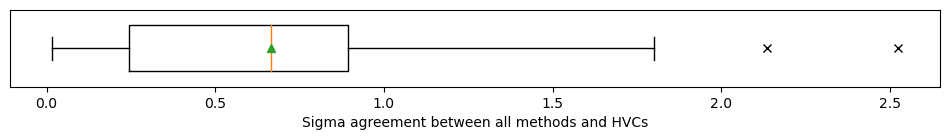

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,1))
plt.boxplot(agree, vert=False, showmeans=True,widths=0.6, sym="x")
plt.yticks([])
#plt.axvline(8, c='r', linestyle='--', label=r"Smith Cloud")
plt.xlabel(r"Sigma agreement between all methods and HVCs")
#plt.xscale('log')
#plt.xlim(0.1, 15)
#plt.legend()
plt.show()

## Chi-Squared (Not usable for intra-methodological comparison)

In [6]:
import numpy as np

def chisq(expected, observed, uncertainty, params=0):
    SSQ = np.sum(((expected - observed)/uncertainty)**2)
    df = len(expected) - params
    return SSQ / df
    

# KS-EDF
chisq_KS = chisq(results["Average [diff]"], results["Statistic_diff"], results["KS unc"])

# Variance Subtraction
chisq_sigma = chisq(results["Average [diff]"], results["Sigma [diff]"], results["Sigma unc"])

print("KS-EDF Reduced Chi-Squared:    "+str(chisq_KS))
print("Var. Sub. Reduced Chi-Squared: "+str(chisq_sigma))

KS-EDF Reduced Chi-Squared:    0.13776398010171412
Var. Sub. Reduced Chi-Squared: 14.2513911127433


# Foreground Statistical Analysis

## $R^2$ Correlation Tests

$R^2$ values should only compare interpolation with fourier corrected interpolations.

In [14]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, collation_tools as ct
from plotting import honours_plot as hplt
import matplotlib.pyplot as plt

collated_data_1 = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

collated_data_2 = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms_annulus","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

collated_data_3 = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms_craig_annulus","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

collated_data_4 = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms_annulus_compare","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

# Key:
# 1 = Bandpass
# 2 = Annulus
# 3 = Craig's Annulus
# 4 = Annulus Comparison (Craig Annulus = Corrected)

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [19]:
from scipy.stats import pearsonr as pr
import numpy as np

def drop_nan_xy(x,y): return x[~np.isnan(y)]
def drop_nan(x): return x[~np.isnan(x)]

print("Interpolation vs. Crosshatch-Bandpassed:  "+str(pr(collated_data_1["RMs"]["interpolation_raw"], collated_data_1["RMs"]["interpolation_cor"]).statistic ** 2))
print("Interpolation vs. Annulus-Bandpassed:     "+str(pr(collated_data_2["RMs"]["interpolation_raw"], collated_data_2["RMs"]["interpolation_cor"]).statistic ** 2))
print("Interpolation vs. Annulus-Convolved:      "
      + str(pr(
            drop_nan_xy(collated_data_3["RMs"]["interpolation_raw"], collated_data_3["RMs"]["interpolation_cor"]),
            drop_nan(collated_data_3["RMs"]["interpolation_cor"])
            ).statistic ** 2))
print("Annulus-Bandpassed vs. Annulus-Convolved: "
      +str(pr(
            drop_nan_xy(collated_data_4["RMs"]["interpolation_raw"], collated_data_4["RMs"]["interpolation_cor"]),
            drop_nan(collated_data_4["RMs"]["interpolation_cor"])
            ).statistic ** 2))

Interpolation vs. Crosshatch-Bandpassed:  0.9278674022265158
Interpolation vs. Annulus-Bandpassed:     0.0076113610475680715
Interpolation vs. Annulus-Convolved:      0.003865686865746511
Annulus-Bandpassed vs. Annulus-Convolved: 1.389374578886861e-06


## Chi-Squared Normal Distribution Fitting

In [62]:
from scipy.stats import chisquare as csq
from scipy.stats import cauchy
import numpy as np

def get_hist(res):
    return np.histogram(res, range=(-100,100), bins=100, density=True)

def mad(res):
    mean = np.mean(res)
    sumr = 0
    for r in res:
        sumr = sumr + np.abs(r-mean)
    return sumr / len(res)

def get_fit(res):
    hist = get_hist(res)
    std = mad(res) /1.5
    normarr = []

    for i in range(len(hist[0])):
        normarr.append(cauchy.cdf(hist[1][i+1], loc=0, scale=std) - cauchy.cdf(hist[1][i], loc=0, scale=std))

    plt.hist(hist[1][:-1], hist[1], weights=normarr, color=[0.8, 0.1, 0.1, 0.4])
    plt.hist(hist[1][:-1], hist[1], weights=hist[0], color=[0.1, 0.1, 0.8, 0.4])
    plt.show()

res1 = drop_nan((collated_data_1["RMs"]["RM"] - collated_data_1["RMs"]["interpolation_raw"]).data)
res2 = drop_nan((collated_data_1["RMs"]["RM"] - collated_data_1["RMs"]["interpolation_cor"]).data)
res3 = drop_nan((collated_data_2["RMs"]["RM"] - collated_data_2["RMs"]["interpolation_cor"]).data)
res4 = drop_nan((collated_data_3["RMs"]["RM"] - collated_data_3["RMs"]["interpolation_cor"]).data)

#get_fit(res1)

print("Straight Interpolation Residuals - std: "+str(np.std(res1))+", mean: "+str(np.mean(res1)))
print("Crosshatch-Bandpassed Residuals -  std: "+str(np.std(res2))+", mean: "+str(np.mean(res2)))
print("Annulus-Bandpassed Residuals -     std: "+str(np.std(res3))+", mean: "+str(np.mean(res3)))
print("Annulus-Convolved Residuals -      std: "+str(np.std(res4))+", mean: "+str(np.mean(res4)))

Straight Interpolation Residuals - std: 92.84404478273123, mean: 3.365322842703443
Crosshatch-Bandpassed Residuals -  std: 92.14267842053354, mean: 3.327332396895
Annulus-Bandpassed Residuals -     std: 100.52490344900797, mean: 18.91406859892236
Annulus-Convolved Residuals -      std: 75.87139888994481, mean: 17.865584857837078


# Check KS Test Correlations

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap, collation_tools as ct
from synthesis import hvc_looper as hvcl, magnetic_field_derivation as mfd, KStest, uncertainty_subtraction as us

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", override_RMs=True)

master_hvcs = hvcl.load_HVCs(collated_data, hvc_indicies=[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 24])

results = ct.read_processed("../data_processed/hvc_KS_tests/hvc_KS_RM_average")
results

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete
=== HVC RM LOADER ===
Taking HVC snapshots
Process complete


Name,Statistic,p_value,Statistic_x,Statistic_sgn,Statistic_diff,Significant
str15,float64,float64,float64,int32,float64,bool
G038.7-37.3-241,0.2074738871132492,3.5194997048780594e-09,-23.129523665567874,-1,16.86046632442212,True
G038.8-33.2-261,0.31066825775656326,1.3943532792837091e-08,-6.963302929232215,-1,12.50616654023725,True
G043.4-30.4-230,0.24109469074986317,3.606854288675973e-11,-9.607423653882606,-1,17.56975352329457,True
G089.0-64.7-311,0.3738140417457306,0.015075834341180974,-17.51573024976091,1,-12.06027479430546,False
G133.5-75.6-294,0.46130268199233715,4.570648166268751e-08,-5.571498219868521,-1,9.893967245596944,True
G248.9+36.8+181,0.08070447918650822,0.452664079053446,-9.22561988896952,-1,1.9355412721916405,False
G261.5-34.5+237,0.2889454915944982,5.960798790546759e-08,-9.242870775459728,-1,11.928300395711442,True
G262.4-26.2+143,0.21329644533869885,1.2224926075128765e-06,5.330447266073939,-1,13.188305123931798,True
G264.6-53.3+224,0.3195887445887446,4.0730287570954555e-05,2.861884589161079,1,-6.697674970398481,True


In [12]:
from astropy.table import hstack, vstack
from scipy.stats import pearsonr as pr
import numpy as np

hvcs = []
for hvc in master_hvcs:
    hvcs.append(hvc['HVC'])

hvcs = vstack(hvcs)

combined = hstack([results, hvcs])

statistic1 = pr(combined["Statistic"], combined["SkyCoord"].galactic.b).statistic ** 2
statistic2 = pr(combined["p_value"], combined["SkyCoord"].galactic.b).statistic ** 2
statistic3 = pr(combined["p_value"], combined["VGSR"]).statistic ** 2
statistic4 = pr(combined["p_value"], combined["VLSR"]).statistic ** 2
print("R^2 of KS Statistic v. Gal. Lat.: " + str(statistic1))
print("R^2 of KS p_value v. Gal. Lat.:   " + str(statistic2))
print("R^2 of KS Statistic v. VGSR:      " + str(statistic3))
print("R^2 of KS Statistic v. VLSR:      " + str(statistic4))

R^2 of KS Statistic v. Gal. Lat.: 0.6038583499306579
R^2 of KS p_value v. Gal. Lat.:   0.44878319072422423
R^2 of KS Statistic v. VGSR:      0.008367183626360204
R^2 of KS Statistic v. VLSR:      0.030226871787027466
